# Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**

https://github.com/saingersoll/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [ ]:
### ===== FINAL CODE =====

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [5]:
import pandas as pd                                                      # reading in libraries
import matplotlib.pyplot as plt


catch_original = pd.read_csv('salmon_data.csv')                         # reading in data

catch_original.head()                                                   # checking dataframe was read in properly

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [29]:
print(catch_original.notesRegCode.unique())                          # print the unique values in selected column

AttributeError: 'DataFrame' object has no attribute 'notesRegCode'

In [ ]:
catch_original = catch_original.loc[:,["Region", "Year", "Species", 'Catch']]         # removing notesRegCode from df

# df.drop() is another applicable method

In [30]:
catch_original.head()                                                # checking to make sure the column was removed

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [31]:
catch_original.dtypes                                        # calls for the description of each columns data type

# ANSWER: Almost every column contains the expected type, except catch. I would have assumed catch to be an int64 because it contains numeric values

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [32]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

0    0
1    0
2    0
3    0
4    0
Name: Catch, dtype: int64

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [41]:
print(catch_original.Catch.unique())

['0']


In [44]:
catch_original[(catch_original['Catch'] == 'l')]                            # identifying misinterpreted rows

,Region,Year,Species,Catch


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [47]:
catch_original.at['I', 'Catch'] = 1                      # converts misinterpreted data points into correct values 
catch_original.iloc[401, : ]                             # confirms data was updated   

IndexError: single positional indexer is out-of-bounds

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [53]:
catch_original['catch_data'] = catch_original.Catch.astype('int64')     # updating column name and data type

catch_original = catch_original.drop(columns = 'Catch')                 # removes unwanted column

catch_original.dtypes                                                   # displays columns data types

Region         object
Year          float64
Species        object
catch_data      int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [58]:
catch_average = catch_original.groupby('Region').mean().catch_data      # storing a new data frame that is grouped by average catch per region

catch_average.head()                                                    # displays dataset created

Region
SSE    0.0
Name: catch_data, dtype: float64

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

AttributeError: 'Rectangle' object has no property 'columns'

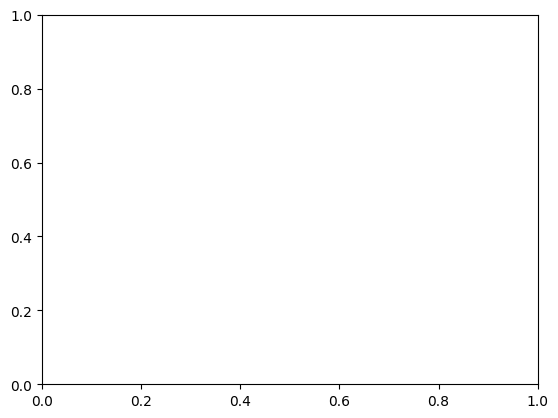

In [64]:
catch_average.plot(kind = "bar",                                       # type of graph., bar
                   columns = "Region",                                 # columns to assess by
                   values = 'catch_data',                              # count for columns
                   title='Average Catch by Region from 1878-1997',     # title
                   xlabel= 'Year',                                     # x label
                  ylabel = 'Average Catch')                            # y label

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.